# Naive Bayes Classifiers

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

However, they tend to be **even faster in training**. 


---

## Gaussian Naive Bayes

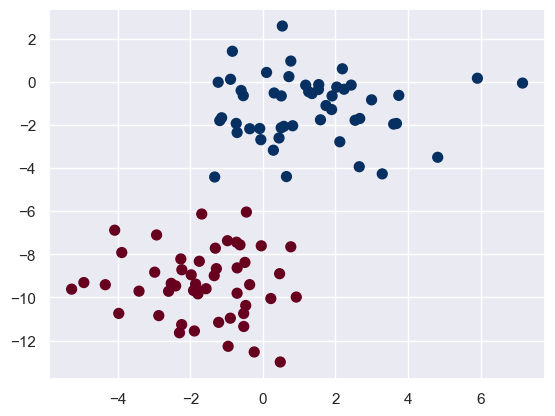

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.show()

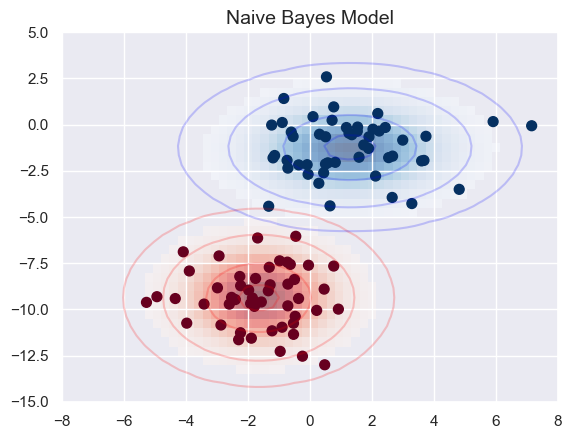

In [3]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)
plt.show()

In [4]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);

In [5]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

ynew = model.predict(Xnew)

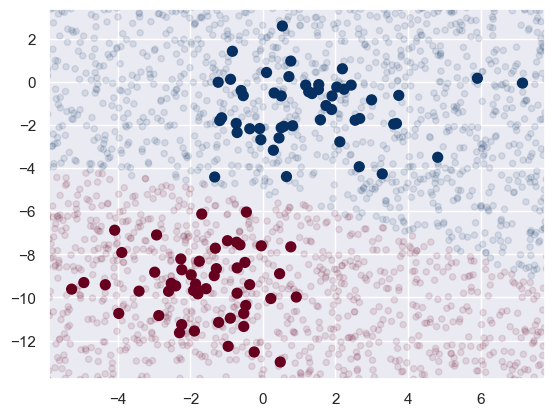

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
# plot new data
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);
plt.show()

In [7]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Example: Multinomial Naive Bayes - Classifying Text

In [8]:
from sklearn.datasets import fetch_20newsgroups

In [10]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [12]:
for i in train.data[:3]:
    print(i)
    print(30*"=")

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer()

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [15]:
tfidf.fit(train.data)
train_data_transorfed = tfidf.transform(train.data)
test_data_transorfed = tfidf.transform(test.data)

In [16]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [17]:
mnb.fit(train_data_transorfed, train.target)

MultinomialNB()

In [18]:
labels = mnb.predict(test_data_transorfed)

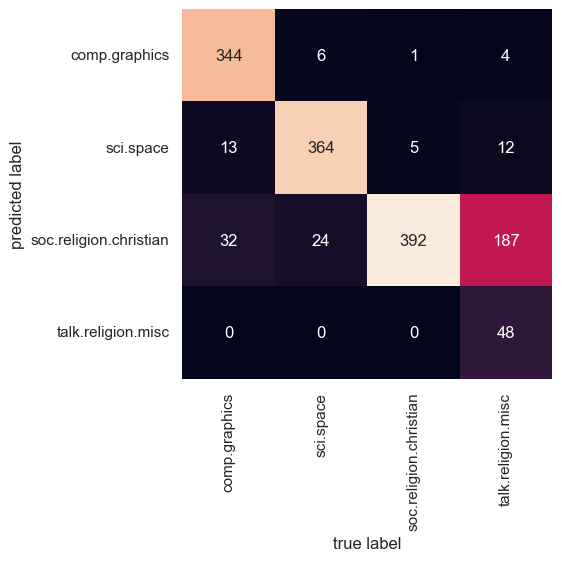

In [20]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [21]:
def predict_category(s, train=train, model=mnb, tfidf=tfidf):
    s_trasfomed = tfidf.transform([s])
    pred = model.predict(s_trasfomed)
    return train.target_names[pred[0]]

In [22]:
predict_category('sending a payload to the ISS')

'sci.space'

In [23]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [24]:
predict_category('determining the screen resolution')

'comp.graphics'

In [25]:
predict_category('my gpu card is very expensive')

'comp.graphics'

In [ ]:
predict_category('my gpu card is very expensive')

## Parameters

- MultinomialNB and BernoulliNB have a single parameter, **`alpha`, which controls
model complexity**. 
- The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. 
- This results in a “smoothing” of the statistics. 
- **A large alpha means more smoothing, resulting in less complex models.**
- The algorithm’s performance is relatively robust to the setting of alpha, meaning that setting alpha is not critical for good performance. However, tuning it usually improves accuracy somewhat.

## Strengths

That said, they have several advantages:
- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable (the training procedure is easy to understand)
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a **good choice as an initial baseline classification**. 
1. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. 
2. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.


Naive Bayes classifiers tend to perform especially well in one of the following situations:
- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

This means that **clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions**, assuming the new dimensions actually add information. 

For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: **once you have enough data, even a simple model can be very powerful**.

## Weaknesses

Because naive Bayesian classifiers make such **stringent assumptions about data**, they will generally **not perform as well as a more complicated model**. 

## Usage

- GaussianNB is mostly used on very high-dimensional data.
- BernoulliNB, and MultinomialNB are widely used for sparse count data such as text.